In [27]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data and Combine the data into a single dataset
city_data_to_load = pd.read_csv(city_data_to_load)
ride_data_to_load = pd.read_csv(ride_data_to_load)

merges_df = pd.merge(city_data_to_load, ride_data_to_load, on="city")

# Display the data table for preview
merges_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


TypeError: 'str' object is not callable

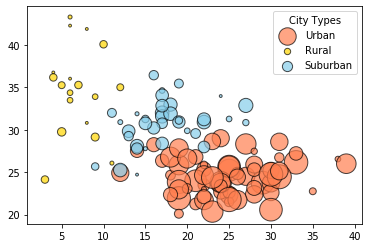

In [28]:
# Obtain the x and y coordinates for each of the three city types
#Urban
Urban_fares = merges_df[merges_df["type"] == "Urban"].groupby("city").fare.mean()
Urban_ride = merges_df[merges_df["type"] == "Urban"].groupby("city").ride_id.count()
Urban_driver = merges_df[merges_df["type"] == "Urban"].groupby("city").driver_count.mean()

urban_x_axis = Urban_fares
urban_y_axis = Urban_ride
urban_z_axis = Urban_driver
#Rural
rural_fares = merges_df[merges_df["type"] == "Rural"].groupby("city").fare.mean()
rural_ride = merges_df[merges_df["type"] == "Rural"].groupby("city").ride_id.count()
rural_driver = merges_df[merges_df["type"] == "Rural"].groupby("city").driver_count.mean()

rural_x_axis = rural_fares
rural_y_axis = rural_ride
rural_z_axis = rural_driver
#Suburban
suburban_fares = merges_df[merges_df["type"] == "Suburban"].groupby("city").fare.mean()
suburban_ride = merges_df[merges_df["type"] == "Suburban"].groupby("city").ride_id.count()
suburban_driver = merges_df[merges_df["type"] == "Suburban"].groupby("city").driver_count.mean()

suburban_x_axis = suburban_fares
suburban_y_axis = suburban_ride
suburban_z_axis = suburban_driver

# Build the scatter plots for each city types
# Incorporate the other graph properties
# Incorporate a text label regarding circle size
Urban = plt.scatter(urban_y_axis, urban_x_axis, s=urban_z_axis*8, facecolors="Coral", alpha=0.7, edgecolors="black", linewidth=1, label="Urban")
Rural = plt.scatter(rural_y_axis, rural_x_axis, s=rural_z_axis*8, facecolors="Gold", alpha=0.7, edgecolors="black", linewidth=1, label="Rural")
Suburban = plt.scatter(suburban_y_axis, suburban_x_axis, s=suburban_z_axis*8, facecolors="SkyBlue", alpha=0.7, edgecolors="black", linewidth=1, label="Suburban")

# Create a legend
plt.legend(handles = [Urban,Rural,Suburban], loc="best", title="City Types")

# Incorporate a text label regarding circle size
plt.title("Pybr Ride Sharing Data 2016")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fees($)")

# Save Figure


C:\Users\Nick\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


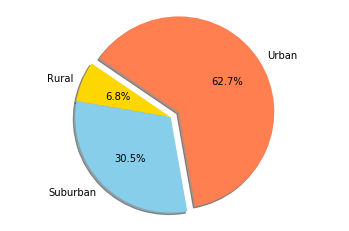

In [29]:
# Calculate Type Percents
fares_sum = merges_df["fare"].sum()
Urban_fares = merges_df[merges_df["type"] == "Urban"].groupby("type").fare.sum()
urban_fares_per = (Urban_fares/fares_sum)*100

rural_fares = merges_df[merges_df["type"] == "Rural"].groupby("type").fare.sum()
rural_fares_per = (rural_fares/fares_sum)*100

suburban_fares = merges_df[merges_df["type"] == "Suburban"].groupby("type").fare.sum()
suburban_fares_per = (suburban_fares/fares_sum)*100

# Build Pie Chart
Percents = [urban_fares_per, rural_fares_per, suburban_fares_per]
labels = ["Urban", "Rural", "Suburban"]
colors = ["Coral", "Gold", "SkyBlue"]
plt.pie(Percents, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=280, explode = (0.1,0,0))
plt.axis("equal")
plt.title= ("% Of Total Fares by City Type")
plt.show()
# Save Figure

C:\Users\Nick\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


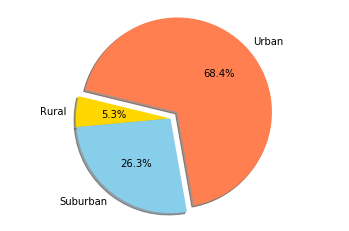

In [30]:
# Calculate Ride Percents
ride_sum = merges_df["ride_id"].count()
Urban_ride = merges_df[merges_df["type"] == "Urban"].groupby("type").ride_id.count()
urban_ride_per = (Urban_ride/ride_sum)*100

rural_ride = merges_df[merges_df["type"] == "Rural"].groupby("type").ride_id.count()
rural_ride_per = (rural_ride/ride_sum)*100

Suburban_ride = merges_df[merges_df["type"] == "Suburban"].groupby("type").ride_id.count()
Suburban_ride_per = (Suburban_ride/ride_sum)*100

# Build Pie Chart
Percents = [urban_ride_per, rural_ride_per, Suburban_ride_per]
labels = ["Urban", "Rural", "Suburban"]
colors = ["Coral", "Gold", "SkyBlue"]
plt.pie(Percents, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=280, explode = (0.1,0,0))
plt.axis("equal")
plt.title= ("% Of Total Rides by City Type")
plt.show()
# Save Figure


C:\Users\Nick\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


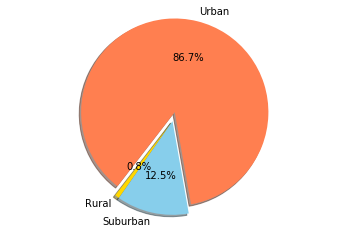

In [31]:
# Calculate Driver Percents
driver_sum = merges_df["driver_count"].sum()
Urban_driver = merges_df[merges_df["type"] == "Urban"].groupby("type").driver_count.sum()
urban_drivers_per = (Urban_driver/driver_sum)*100

Rural_driver = merges_df[merges_df["type"] == "Rural"].groupby("type").driver_count.sum()
Rural_drivers_per = (Rural_driver/driver_sum)*100

Suburban_driver = merges_df[merges_df["type"] == "Suburban"].groupby("type").driver_count.sum()
Suburban_drivers_per = (Suburban_driver/driver_sum)*100


# Build Pie Charts
Percents = [urban_drivers_per, Rural_drivers_per, Suburban_drivers_per]
labels = ["Urban", "Rural", "Suburban"]
colors = ["Coral", "Gold", "SkyBlue"]
plt.pie(Percents, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=280, explode = (0.1,0,0))
plt.axis("equal")
plt.title= ("% Of Total Drivers by City Type")
plt.show()